[ 1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.
  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  0.  1.
  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.
  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  1.  1.
  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.
  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


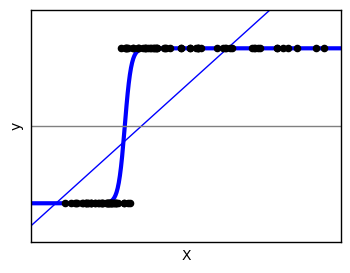

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)


print y

X = X[:, np.newaxis]
# run the classifier

clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='blue', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(())
plt.yticks(())
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)

plt.show()